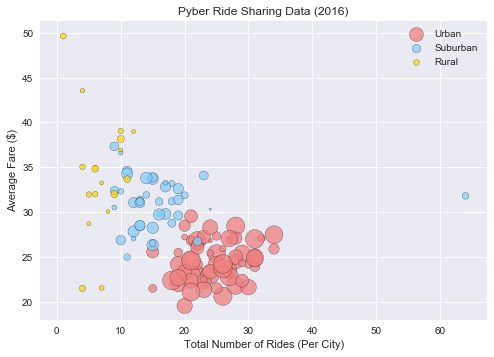

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ride_data = pd.read_csv('raw_data/ride_data.csv')
city_data = pd.read_csv('raw_data/city_data.csv')

#Merge the ride_summary data with the city_data
pyber = pd.merge(ride_data, city_data, on = 'city')
pyber.head()

#Subset data into three separate dataframes by type
urban = pyber.loc[pyber['type'] == 'Urban']
suburban = pyber.loc[pyber['type'] == 'Suburban']
rural = pyber.loc[pyber['type'] == 'Rural']

urban.head()

#Urban DataFrame
ride_counts = pd.DataFrame(urban.groupby('city').count()['date'], index = None).reset_index()
ride_counts = ride_counts.rename(columns = {'date':'ride_count'})
urban = pd.merge(urban, ride_counts, on = 'city')
urban = pd.DataFrame(urban.groupby('city').mean()).reset_index()

#Suburban DataFrame
ride_counts = pd.DataFrame(suburban.groupby('city').count()['date'], index = None).reset_index()
ride_counts = ride_counts.rename(columns = {'date':'ride_count'})
suburban = pd.merge(suburban, ride_counts, on = 'city')
suburban = pd.DataFrame(suburban.groupby('city').mean()).reset_index()

#Rural DataFrame
ride_counts = pd.DataFrame(rural.groupby('city').count()['date'], index = None).reset_index()
ride_counts = ride_counts.rename(columns = {'date':'ride_count'})
rural = pd.merge(rural, ride_counts, on = 'city')
rural = pd.DataFrame(rural.groupby('city').mean()).reset_index()

import seaborn as sns
# use the scatter function
urban_plot = plt.scatter(x = urban['ride_count'], y = urban['fare'], s = urban['driver_count'] * 5, alpha = 0.75,
                        edgecolors = 'black', color = 'lightcoral', label = 'Urban')
suburban_plot = plt.scatter(x = suburban['ride_count'], y = suburban['fare'], s = suburban['driver_count'] * 5, alpha = 0.75,
                        edgecolors = 'black', color = 'lightskyblue', label = 'Suburban')
rural_plot = plt.scatter(x = rural['ride_count'], y = rural['fare'], s = rural['driver_count'] * 5, alpha = 0.75,
                        edgecolors = 'black', color = 'gold', label = 'Rural')

plt.legend(loc="best")

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.show()


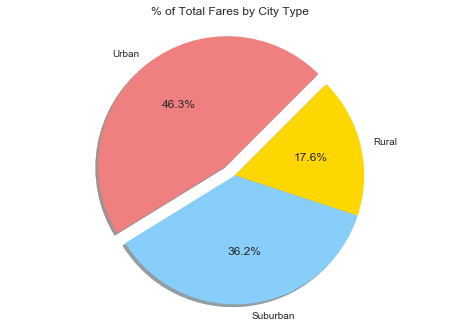

In [2]:
#Create pie charts
#1. Total fares by city type

#Create variables to hold the total sum of fares
fare_total_urban = urban['fare'].sum()
fare_total_suburban = suburban['fare'].sum()
fare_total_rural = rural['fare'].sum()

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [fare_total_urban, fare_total_suburban, fare_total_rural]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1,0,0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)

# Tells matplotlib that we want a pie chart with equal axes
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.show()

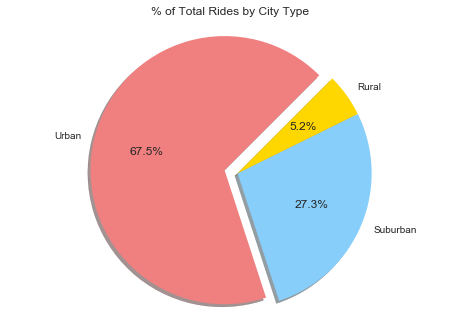

In [3]:
#2. Total rides by city type
#Create variables to hold the total sum of fares
rides_total_urban = urban['ride_count'].sum()
rides_total_suburban = suburban['ride_count'].sum()
rides_total_rural = rural['ride_count'].sum()

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [rides_total_urban, rides_total_suburban, rides_total_rural]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1,0,0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)

# Tells matplotlib that we want a pie chart with equal axes
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

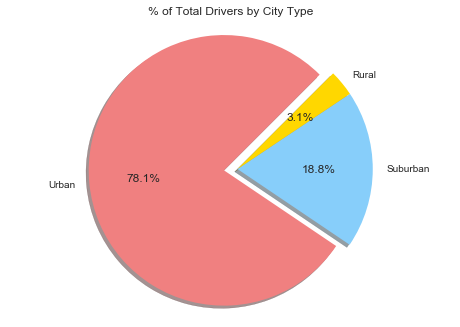

In [4]:
#3. Total drivers by city type

#Create variables to hold the total sum of fares
drivers_total_urban = urban['driver_count'].sum()
drivers_total_suburban = suburban['driver_count'].sum()
drivers_total_rural = rural['driver_count'].sum()

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [drivers_total_urban, drivers_total_suburban, drivers_total_rural]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1,0,0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)

# Tells matplotlib that we want a pie chart with equal axes
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()

In [5]:
#Three observable trends:
#1 The majority of rides are in urban areas 
#2 The highest population of drivers are in urban areas
#3 Where there is less access to drivers, in rural areas, they have the lowest total ride count